# Machine Learning Tutorial - Absenteeism at Work 

In [1]:
#Dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Load Data 

In [2]:
raw_data=pd.read_excel('Absenteeism_at_work.xls')

# Clean Data

In [3]:
#Seperate into two seperate categories to change the datatype
categorical_set = ["Reason for absence","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Social drinker","Social smoker"]

numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]

## Converting categorical_set data into category types 
for i in categorical_set :
    raw_data[i] = raw_data[i].astype("category")

for i in numerical_set :
    raw_data[i] = raw_data[i].astype("float64")  

In [4]:
raw_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26,7,3,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,4.0
1,36.0,0,7,3,1,118.0,13.0,18.0,50.0,239554.0,...,1,1,1.0,1,0,0.0,98.0,178.0,31.0,0.0
2,3.0,23,7,4,1,179.0,51.0,18.0,38.0,239554.0,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,2.0
3,7.0,7,7,5,1,279.0,5.0,14.0,39.0,239554.0,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,4.0
4,11.0,23,7,5,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,2.0


In [5]:
raw_data.shape

(740, 21)

# Fit Data in to (X,y)

In [6]:
X = raw_data.drop("Absenteeism time in hours", axis=1)
y = raw_data["Absenteeism time in hours"]
print(X.shape, y.shape)

(740, 20) (740,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Linear Regression Model 1

In [8]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [9]:
model1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model1.predict(X_test)
y_predicted = np.round_(y_predicted,0)

In [10]:
# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")

Mean Squared Error (MSE): 111.17567567567568
R squared (R2 ): -0.020206455072560914


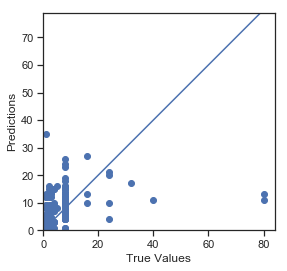

In [11]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Decision Tree Model 2

In [12]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()

In [13]:
model2.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model2.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 300.9864864864865
R-squared (R2 ): -1.7620102557227608


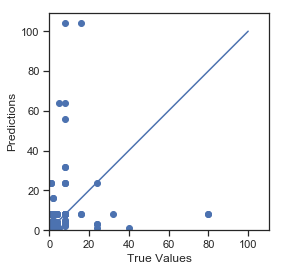

In [14]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Random Forest Model 3 (n_estimators=100)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier(n_estimators=100)

C:\Users\aruba\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
model3.fit(X_train, y_train)


# Use our model to predict a value
y_predicted = model3.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 128.3918918918919
R-squared (R2 ): -0.17819150718906074


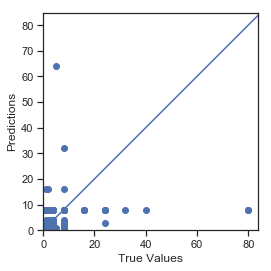

In [18]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Deep Learning Models Using Keras Model 4

In [19]:
# define and fit the final model
model4 = Sequential()

In [20]:
model4.add(Dense(20, input_dim=20, activation='relu'))
model4.add(Dense(20, activation='relu'))
model4.add(Dense(1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model4.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model4.fit(X_train, y_train, epochs=1000, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [25]:
# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model4.predict(X_test)
y_predicted = np.round_(y_predicted,0)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

loss, mae, mse = model4.evaluate(X_test, y_test, verbose=0)

print("Mean Absulte Error: {:5.2f}".format(mae))
print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")

Mean Absulte Error: 17.26
Mean Squared Error (MSE): 336.92122258366766
R squared (R2 ): -2.105199919562959


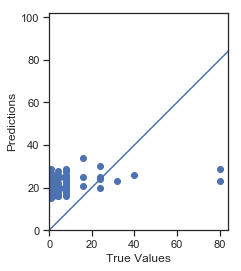

In [26]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])